# Flour beetle example

# Set environment

In [1]:
library(tidyverse)
library(IRdisplay)

── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──
✔ ggplot2 3.0.0     ✔ purrr   0.2.5
✔ tibble  1.4.2     ✔ dplyr   0.7.6
✔ tidyr   0.8.1     ✔ stringr 1.3.1
✔ readr   1.1.1     ✔ forcats 0.3.0
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


In [13]:
source("./codesnippet_r/f.glm.diag.R")

# Flour Beetle Example

In [7]:
flour = tribble(
  ~cs, ~batch, ~y, ~n,
  49.06, 0,  2, 29,
  49.06, 1,  4, 30,
  52.99, 0,  7, 30,
  52.99, 1,  6, 30,
  56.91, 0,  9, 28,
  56.91, 1,  9, 34,
  60.84, 0, 14, 27,
  60.84, 1, 14, 29,
  64.76, 0, 23, 30,
  64.76, 1, 29, 33,
  68.69, 0, 29, 31,
  68.69, 1, 24, 28,
  72.61, 0, 29, 30,
  72.61, 1, 32, 32,
  76.54, 0, 29, 29,
  76.54, 1, 31, 31,
)

display(flour)

cs,batch,y,n
49.06,0,2,29
49.06,1,4,30
52.99,0,7,30
52.99,1,6,30
56.91,0,9,28
56.91,1,9,34
60.84,0,14,27
60.84,1,14,29
64.76,0,23,30
64.76,1,29,33


# fit model

In [9]:
flour_fit = glm(cbind(y, n-y) ~ cs, data = flour, family = binomial, x = T)
summary(flour_fit)


Call:
glm(formula = cbind(y, n - y) ~ cs, family = binomial, data = flour, 
    x = T)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.1290  -0.4164   0.2758   0.9271   1.5347  

Coefficients:
             Estimate Std. Error z value Pr(>|z|)    
(Intercept) -14.80845    1.28976  -11.48   <2e-16 ***
cs            0.24917    0.02138   11.65   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 289.141  on 15  degrees of freedom
Residual deviance:  12.505  on 14  degrees of freedom
AIC: 58.474

Number of Fisher Scoring iterations: 4


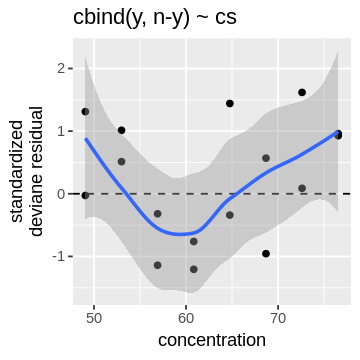

In [29]:
dat = cbind(flour, f.glm.diag(flour_fit))
gp  = ggplot(dat, aes(x = cs, y = sdres))
gp  = gp +
    geom_point() + 
    geom_hline(yintercept = 0, lty = 2) +
    geom_smooth(method = "loess") +
    labs(title = "cbind(y, n-y) ~ cs",
         x = "concentration", y = "standardized\ndeviane residual")

options(repr.plot.width = 3, repr.plot.height = 3)
print(gp)
#options(repr.plot.width=8, repr.plot.height=3)

In [32]:
flour_fit_cssq = glm(cbind(y, n-y) ~ cs + I(cs^2), data = flour, family = binomial, x = T)
summary(flour_fit_cssq)


Call:
glm(formula = cbind(y, n - y) ~ cs + I(cs^2), family = binomial, 
    data = flour, x = T)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.2811  -0.5418   0.1436   0.4311   1.5281  

Coefficients:
             Estimate Std. Error z value Pr(>|z|)  
(Intercept)  7.968410  11.036327   0.722   0.4703  
cs          -0.516593   0.373635  -1.383   0.1668  
I(cs^2)      0.006372   0.003143   2.027   0.0426 *
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 289.1413  on 15  degrees of freedom
Residual deviance:   7.9273  on 13  degrees of freedom
AIC: 55.896

Number of Fisher Scoring iterations: 5


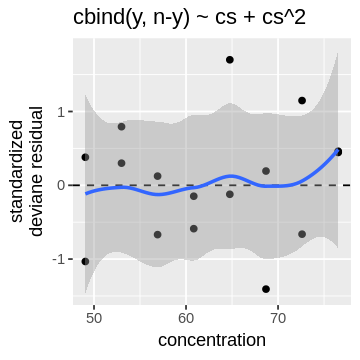

In [33]:
dat = cbind(flour, f.glm.diag(flour_fit_cssq))
gp  = ggplot(dat, aes(x = cs, y = sdres))

gp  = gp +
    geom_point() + 
    geom_hline(yintercept = 0, lty = 2) +
    geom_smooth(method = "loess") +
    labs(title = "cbind(y, n-y) ~ cs + cs^2",
         x = "concentration", y = "standardized\ndeviane residual")

options(repr.plot.width = 3, repr.plot.height = 3)
print(gp)
#options(repr.plot.width=8, repr.plot.height=3)

In [36]:
print(influence(flour_fit_cssq))

$hat
         1          2          3          4          5          6          7 
0.34567208 0.35759181 0.15918243 0.15918243 0.16548406 0.20094494 0.19483079 
         8          9         10         11         12         13         14 
0.20926270 0.17545320 0.19299852 0.18979174 0.17142480 0.15445816 0.16475537 
        15         16 
0.07683405 0.08213295 

$coefficients
   (Intercept)           cs       I(cs^2)
1   -6.0576438  0.193860386 -1.541371e-03
2    2.2864221 -0.073171464  5.817815e-04
3    0.7190229 -0.017830737  1.037260e-04
4    0.2713826 -0.006729899  3.914958e-05
5   -0.3010969  0.010805341 -9.406841e-05
6    1.8280013 -0.065600726  5.711024e-04
7    0.4901528 -0.016552808  1.362994e-04
8    2.0351434 -0.068728242  5.659232e-04
9    0.0997207 -0.002692958  1.534729e-05
10  -1.4737657  0.039799041 -2.268165e-04
11   0.4833269 -0.017773300  1.622902e-04
12  -3.3092616  0.121690921 -1.111175e-03
13  -2.3001338  0.081486313 -7.157391e-04
14   4.1415204 -0.146720699  1.288

# Test and inference

### Wald test

In [37]:
summary(flour_fit)


Call:
glm(formula = cbind(y, n - y) ~ cs, family = binomial, data = flour, 
    x = T)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.1290  -0.4164   0.2758   0.9271   1.5347  

Coefficients:
             Estimate Std. Error z value Pr(>|z|)    
(Intercept) -14.80845    1.28976  -11.48   <2e-16 ***
cs            0.24917    0.02138   11.65   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 289.141  on 15  degrees of freedom
Residual deviance:  12.505  on 14  degrees of freedom
AIC: 58.474

Number of Fisher Scoring iterations: 4


### Likelihood ratio test

In [38]:
anova(flour_fit_cssq, test = "Chisq")

,Df,Deviance,Resid. Df,Resid. Dev,Pr(>Chi)
NULL,NA,NA,15,289.141295,NA
cs,1,276.636033,14,12.505262,4.061425e-62
I(cs^2),1,4.577934,13,7.927328,3.238624e-02


### Drop1 test

In [41]:
drop1(flour_fit_cssq, test = "Chisq")

,Df,Deviance,AIC,LRT,Pr(>Chi)
<none>,NA,7.927328,55.89589,NA,NA
cs,1,9.950578,55.91914,2.023250,0.15490728
I(cs^2),1,12.505262,58.47382,4.577934,0.03238624


# Prediction

In [46]:
flour_fit$fitted.values

1         2         3         4         5         6         7         8 
0.0701659 0.0701659 0.1672974 0.1672974 0.3479289 0.3479289 0.5868806 0.5868806 
        9        10        11        12        13        14        15        16 
0.7904820 0.7904820 0.9094611 0.9094611 0.9638696 0.9638696 0.9861163 0.9861163

In [58]:
fit_linear = flour_fit$fitted.values
fit_square = flour_fit_cssq$fitted.values

dat = as.data.frame(cbind(flour, fit_linear, fit_square))
dat

cs,batch,y,n,fit_linear,fit_square
49.06,0,2,29,0.0701659,0.1152001
49.06,1,4,30,0.0701659,0.1152001
52.99,0,7,30,0.1672974,0.1804474
52.99,1,6,30,0.1672974,0.1804474
56.91,0,9,28,0.3479289,0.3114816
56.91,1,9,34,0.3479289,0.3114816
60.84,0,14,27,0.5868806,0.5312930
60.84,1,14,29,0.5868806,0.5312930
64.76,0,23,30,0.7904820,0.7751494
64.76,1,29,33,0.7904820,0.7751494


https://stackoverflow.com/questions/10349206/add-legend-to-ggplot2-line-plotmm

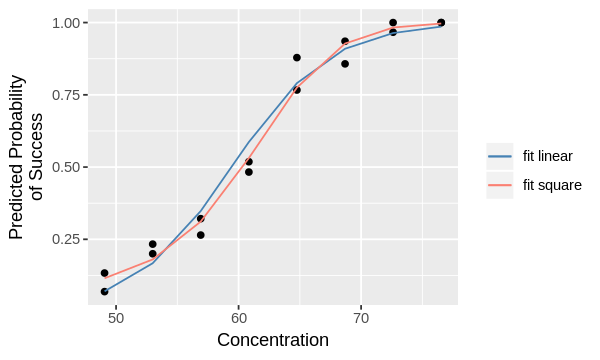

In [67]:
gp = ggplot(dat, aes(x = cs)) +
    geom_point(aes(y = y / n)) +
    geom_line( aes(y = fit_linear, color = 'fit linear')) +
    geom_line( aes(y = fit_square, color = 'fit square')) +
    scale_colour_manual("", 
                      breaks = c("fit linear", "fit square"),
                      values = c("steelblue",  "salmon")) +
    labs(y = "Predicted Probability\nof Success",
         x = "Concentration")

options(repr.plot.width = 5, repr.plot.height = 3)
print(gp)